# <span style="color:crimson">Linear Regression with Regularization</span>

## <span style="color:rebeccapurple">Setup</span>

In [43]:
# imports 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# setting some figure display paramaters
sns.set_context('notebook')
sns.set_style('white', {'axes.linewidth': 0.5})
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

plt.rcParams['figure.dpi'] = 150
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['legend.edgecolor'] = 'w'

## <span style="color:rebeccapurple">Linear regression - The math behind the scenes!</span>

In a kNN model, we did not have to "train" the model in a traditional machine learning sense. We simply fed in the training data-points, which created some decision boundaries in the feature space. New data points were simple classified depending on where they landed in the feature space  with respect to the decision boundary.

However, most ML models require an explicit training step which requires using a <b>loss function</b> (also called cost function or objective function). The loss function is the penalty term which decides how we will quantify the difference between the observed y values and the predicted y values.<br>


#### Linear regression model 
Linear regression model is typically written out as
$$\begin{align}
y = \beta_0 + \sum_{i=1}^N \beta_i x_i
\end{align}$$
where $y$ is the output, $x_i$ are the predictors and $N$ is the number of predictors. What we want to learn is the set of parameters, or weights, $\beta_i, i=0,...N$. <br><br>


#### The cost function
To learn these parameters, sklearn will minimize the residual sum of squares
$$
RSS = (y_{pred} - y_{obs})^2 = (\beta_0 + \sum_{i=1}^N \beta_i x_i - y_{obs})^2
$$
where $M$ is the number of observations.

Of all possible values that $\beta$ parameters can take, we want to find the best possible values where the loss (i.e the RSS here) is the smallest. In other words, the mapping between the training y values and predicted y values has the smallest error.

There are other loss functions you could choose, for example MAE error (median absolute error). You can also create your own loss function depending on what you are trying to acheive with your model. However, as we will see below, it is critical that the cost/loss function you choose is <b>differentiable</b>.<br><br>


#### The Loss surface
Let's look at this more closely.

Imagine you have two predictors for your linear model - x1 and x2. This means there are two weights or $\beta$ values we need to find which will give us the best prediction model. 
* Imagine that I have a grid of values such that on one axis I have possible values for $\beta_1$ and on the other axis I have possible values for $\beta_2$
* Next, I calculate the loss for each point ($\beta_1$, $\beta_2$) in the grid
* I plot the value of the error (loss) on the z-axis for each pair of ($\beta_1$, $\beta_2$)
* I will then obtain a <b>loss surface</b> which might look something like the image below

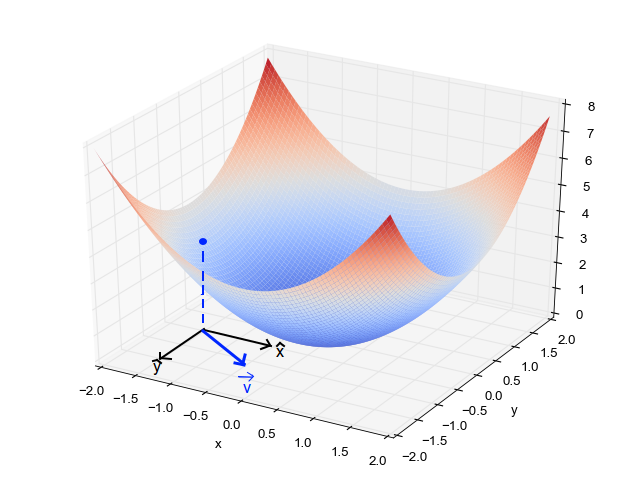

In [47]:
from IPython.display import Image, display
display(Image('images/SGD_simple.png', width=500))

Our objective is to find the special values ($\beta_1^*$, $\beta_2^*$) where the loss is the smallest. But we can't possibly search the whole infinite real space, and maybe there is a smarter way to find the minima.

#### Minimizing model loss with gradient descent
Gradient descent is a mathematical optimization method, which operates as follows:
* Pick any random weights $(\beta_1, \beta_2)$ to initialize or start the optimization
* Calculate the predicted y values for this pair of $\beta$ values as using the linear regression function as below:
$$\begin{align}
y = \beta_0 + \sum_{i=1}^N \beta_i x_i
\end{align}$$
* Now calculate the error/loss (in this case the mean squared error) on your training data-points with your chosen loss/cost function:
$$
L = MSE = (y_{pred} - y_{obs})^2 = (\beta_0 + \sum_{i=1}^N \beta_i x_i - y_{obs})^2
$$
* Now hop over the grid, but which direction should we hop in?? We should go in the direction where the <i>gradient</i> (or slope) of the loss surface is the steepest. The way to find the steepest gradient is to differentiate The loss function $L$ as follows:
$$
\frac{\partial L}{\partial \beta_1},  \frac{\partial L}{\partial \beta_2},
$$
* The derivatives will give us the <i>direction</i> in which the optimizer should take a step. This is why it is important to choose a loss function (such as MSE) that can be easily differentiated.
* The step size is also called the <b>learning rate</b> i.e. how big should the steps be, and therefore how fast should the optimizer move.
* If the steps are too large, it might miss the valley (minima) entirely. If the steps are too small, the optimization will take a lot of time and computing resources. However, for now we don't need to worry about this - algorithms in scikit-learn are usually optimized to adapt the step size iteratively.
* Once the optimizer is at or very close to the minima, the value of the derivatives is going to approach 0 (remember high school math!), and the optimizer has "converged" i.e. stopped taking steps. This is your optimal $(\beta_1, \beta_2)$

While simple models have an simple loss surface, finding the minima can get very complicated very fast for non-linear models

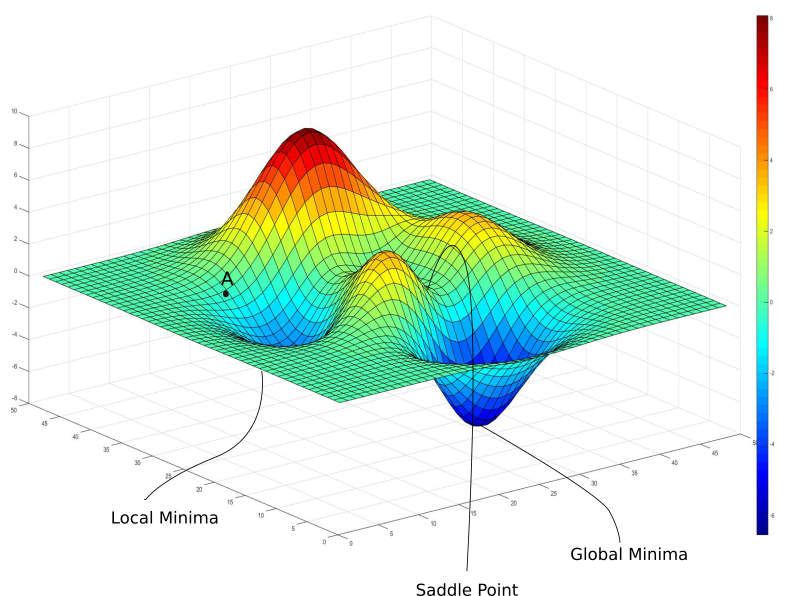

In [49]:
from IPython.display import Image, display
display(Image('images/loss_surface_complex.png', width=600))

## <span style="color:rebeccapurple">Linear regression with scikit-learn!</span>

Fortunately, scikit-learn implements all of this behind the scenes, and all we have to do is call the correct class or object from its library. Let's see how "training" works for a linear regression, and how it is very different from a kNN model.

Let's use some data from fish measurements to see how LR works in practice.

In [6]:
# data import
df = pd.read_csv("data/fish.csv")

<h4><span style="color:blue">Google Colab users only -- un-comment the code lines below and run them to download the dataset and read it</span></h4>

In [ ]:
# !wget https://raw.githubusercontent.com/nuitrcs/scikit-learn-workshop/main/data/fish.csv
# df = pd.read_csv('fish.csv')

In [7]:
df.head()

,species,vertical_len,diag_len,cross_len,height,width,weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0


In [5]:
df.shape

(158, 7)

<b>Problem/Task</b> Say we want to predict the weight of a fish given all the other features we might know about it

### Data exploration

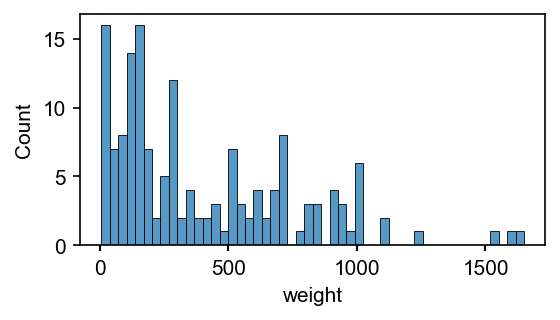

In [9]:
# plot the target distribution
plt.figure(figsize=(4,2))
sns.histplot(df.weight, bins=50)
plt.show()

This data does not look like a normal distribution! Remmeber linear regression has certain assumptions, and normal, or close to normal data is predicted better than highly skewed distributions. So let's transform the target variable with a log transform to make it more suitable for use.

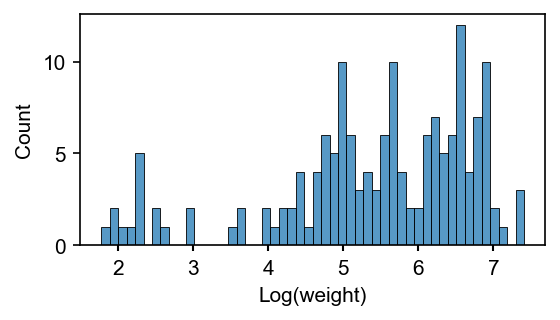

In [12]:
plt.figure(figsize=(4,2))
sns.histplot(df.weight.apply(np.log), bins=50)
plt.xlabel('Log(weight)')
plt.show()

### <span style="color:crimson">Exercise</span>
Group the data by species, and the mean of all columns - do you see significant differences in weight by species?

In [ ]:
df.___(by=_____).mean("weight")

Now we are ready to start modeling. You already know how to do some of the steps!

We decided to predict the `log(weight)` from all other features of the dataset, so we will transform our dataset as follows:

In [ ]:
df.weight = df.weight.apply(np.log)
df.head(3)

### <span style="color:crimson">Exercise</span>

#### Step 1: Feature - Target split

In [ ]:
# separate the input features and the target variable
X = ______
y = ______

X.shape, y.shape

### <span style="color:crimson">Exercise</span>
#### Step 2: Train - Test split

In [ ]:
from sklearn._______ import ________

# split the data 70-30, with 30% in the test set
X_train, X_test, y_train, y_test = train_test_split(___ ,____ , 
                                                    test_size=_____,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

### <span style="color:crimson">Exercise</span>
#### Step 3: Data pre-processing with feature scaling
Remember, scale the training data only!

In [ ]:
from sklearn.preprocessing import ___________

scaler = ______
scaler._____(____)


But wait, we get an error!
There is a categorical feature called `species` in our dataset. How can a categorical variable be converted into a numerical value that we can feed into our loss function and error calculation??

### <span style="color:#1409FA">Detour: Encoding Categorical data</span>
Data sometimes come in non-numeric values in predictors and/or response.

#### <span style="color:teal">Ordinal encoding</span>
This is the process of assigning each unique category an integer value. Doing this, we impose a natural ordered relationship between each category.

For example, age is ordered in nature and we can map the different ranges to integer values. More specifically, 30-39 => 0, 40-49 =>1, 50-59 => 2, etc.

#### <span style="color:teal">One-hot encoding</span>
When there is no natural ordinal relationship among different categories, OrdinalEncoder is not an appropriate approach.

In addition, when the response variable has no ordinal relationship, encoding its labels as ordered integer values can result in poor performance. For example, suppose we encode the response's labels as 0, 1, 2. The algorithm can return a prediction of 1.5.

One-hot encoding is the process of transforming each label of the orginal categorical variable into a new binary variable. This means the total number of features will increase after preprocessing.

Let's see how to do it for our fish dataset.

#### I. Find the fit parameters for standardization

In [19]:
# import the class "OneHotEncoder" from the scikit learn library
from sklearn.preprocessing import OneHotEncoder

In [20]:
# create object/instance of class OneHotEncoder
ohe = OneHotEncoder()

In [21]:
# now feed your categorical columns of train X for pre-processing into this object
categorical_cols = ['species']

ohe.fit(X_train[categorical_cols])

OneHotEncoder()

#### II. Transform the train AND test data with the fit paramaters you found

In [22]:
# transform both train and test
ohe_X_train = ohe.transform(X_train[categorical_cols]) # transform train set
ohe_X_test = ohe.transform(X_test[categorical_cols])   # transform test set

In [23]:
ohe_X_train

<110x7 sparse matrix of type '<class 'numpy.float64'>'
	with 110 stored elements in Compressed Sparse Row format>

In [24]:
# convert to an array
ohe_X_train = ohe_X_train.toarray()
ohe_X_test = ohe_X_test.toarray()

ohe_X_train.shape, ohe_X_test.shape

((110, 7), (48, 7))

### <span style="color:#1409FA">Back to modeling</span>

#### Step 3: Data pre-processing with feature scaling
Remember, scale the training data only!

In [ ]:
# seperate th numerical and categorical columns for pre-processing
numeric_cols = ['vertical_len', 'diag_len', 'cross_len', 'height', 'width']
categorical_cols = ['species']

#### Step 3.1: Scale the numerical features


In [ ]:
# process the numeric columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()           # generate instance
scaler.fit(X_train[numeric_cols])   # fit the scaler with train X

# get the transformed X_train and X_test data
numeric_X_train = scaler.transform(X_train[numeric_cols])
numeric_X_test  = scaler.transform(X_test[numeric_cols])

numeric_X_train.shape, numeric_X_test.shape

#### Step 3.2: One hot encode the categorical features

In [ ]:
# process the categorical columns
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()               # generate instance
ohe.fit(X_train[categorical_cols])  # fit the encoder with train X

# get the transformed X_train and X_test data
ohe_X_train = ohe.transform(X_train[categorical_cols]) # transform train set
ohe_X_test = ohe.transform(X_test[categorical_cols])   # transform test set

# convert to array
ohe_X_train = ohe_X_train.toarray()
ohe_X_test = ohe_X_test.toarray()

ohe_X_train.shape, ohe_X_test.shape

#### Step 3.3: Stack both sets of processed features together

In [ ]:
# use hstack to join the separately processed columns back together
processed_X_train = np.hstack((numeric_X_train, ohe_X_train))
processed_X_test = np.hstack((numeric_X_test, ohe_X_test))

processed_X_train.shape, processed_X_test.shape

#### Step 4: (LR) Model building and optimization for best accuracy

In [15]:
# import the model object class
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression() # create an instance of class "LinearRegression"

In [17]:
# fit the model to your data features and labels
model.fit(processed_X_train, y_train)

NameError: name 'processed_X_train' is not defined

In [ ]:
# look at the model results -- i.e the beta values
# beta0 or the intercept
model.intercept_, np.exp(model.intercept_)

In [ ]:
# beta_i s or the slopes
model.coef_

In [ ]:
model.coef_.shape

In [ ]:
# let's get the feature names so we can see which slope corresponds to which feature
feature_names = numeric_cols + list(ohe.categories_[0])
len(feature_names)

In [ ]:
# get the model coefficients inside a nice dataframe which includes the input feature names
feature_names = numeric_cols + list(ohe.categories_[0])
coefs = pd.DataFrame(data=model.coef_, 
                     columns=["Coefficients"], 
                     index=feature_names,)

In [ ]:
coefs

In [ ]:
# plot the model coefficients
coefs.plot.barh(figsize=(10, 4))
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient values")
plt.subplots_adjust(left=0.3)

### <span style="color:crimson">Exercise</span>
#### Step 5: Generate predictions

In [ ]:
y_predicted_train = ______._____(_________)
y_predicted_test = ______._____(_________)

y_predicted_train.shape, y_predicted_test.shape

In [ ]:
# let's compare our predicted weights to the observed weights
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

axes[0].scatter(y_train, y_predicted_train, s=2)
axes[0].set_title("Train data")
axes[1].scatter(y_test, y_predicted_test, s=2)
axes[1].set_title("Test data")

for ax in axes:
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
    ax.set(xlabel="Observed weight", ylabel="Predicted weight")

### <span style="color:crimson">Exercise</span>
#### Step 6: Model evaluation

We are interested in understanding how well the learned model generalizes. There are several metrics to quantify the quality of a model.

A typical measure for regression is the mean squared error
$$
MSE = \frac{1}{M} (y_{pred} - y_{obs})^2
$$

In [18]:
from sklearn.metrics import mean_squared_error

In [ ]:
# find the test error
test_mse = mean_squared_error(______, ______)
print("test MSE - ", test_mse)

In [ ]:
# find the train error
train_mse = mean_squared_error(______, ______)
print("train MSE - ", train_mse)

Another measure is $R^2$ score, which indicates a goodness of fit. More specifically, it represents the proportion of the response's variance that has been explained by the predictors. Best possible score is 1.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# find the test error
test_r2 = r2_score(______, ______)
print("test R2 - ", test_r2)

# find the train error
train_r2 = r2_score(______, ______)
print("train_r2 R2 - ", train_r2)

### <span style="color:crimson">Exercise</span>
Does it matter if train error is much smaller than test error? Why or why not?

## <span style="color:#1409FA">Can we improve this model?</span>
Remember, we already scaled the features, we also have the optimized model from the gradient descent. Is there any way to make this model even better at predicting unseen data?

## <span style="color:rebeccapurple">Enter regularization!</span></h1>

We are going to use the same approach as before to build our linear model, but this time we will add **regularization**  to the model to see if it can be improved.

Regularization adds a penalty during model training, such that larger weights (coefficients) are penalized. Think of regularization as a method to reduce the dependence of the weights on the data, and to prevent weights from exploding in the presence of extreme outliers.

Remember the linear regressor minimizes the RSS. Now if you add a weight penalty the total "error" looks like:
$$ 
Loss + penalty = RSS + penalty  \\
= (y_{pred} - y_{obs})^2 + penalty  \\
= (\beta_0 + \sum_{i=1}^N \beta_i x_i - y_{obs})^2 + penalty \\
$$

Usually, we use either the L1 norm (lasso) or the L2 norm (ridge) (or a combination of the two called elastic net regression) of the model weights as the penalty. 
$$
L1 = \lambda \sum_{i=1}^N\ \|\beta_i\|
$$

$$
L2 = \lambda \sum_{i=1}^N\beta_i^2
$$

Here, $\lambda$ is the tuning parameter that decides how much we want to penalize the flexibility of our model.

The $\lambda$ parameter determines the strength of regularization -- high alpha  means higher penalty which means less reliability on the training data. Lower alpah means lower penalty which means greater reliability on the training data.

Because of the mathematics behind differentiating the regularization term in the loss function, L1(lasso) norm will reduced unimportant features down to 0 very quickly. So this can be useful when you have lots of features and want to reduce your feature size intelligently.

L2(ridge) norm will reduced unimportant features down, but very rarely to 0. So you will still have the contributions from all featuers, but unimportant features will have very small $\beta$ values.

### <span style="color:crimson">Exercise</span>
Why would we want to regularize i.e. <i>decrease</i> our reliance on the training dataset to build our generalizable model??

#### Step 4 (again): Model building with regularization 

#### Adding regularization to the model
sklearn provides easy functions/classes (as always) to add L1 or L2 regularization to linear models.

The `alpha` parameter is the name scikit-learn uses for $\lambda$ above.

In [34]:
from sklearn import linear_model

In [ ]:
# setting an value of alpha (arbitrary)
alpha = 0.1

In [ ]:
# Instantiate different models
model0 = linear_model.LinearRegression()
model1 = linear_model.Lasso(alpha=alpha)
model2 = linear_model.Ridge(alpha=alpha)
model3 = linear_model.ElasticNet(alpha=alpha, l1_ratio=0.5)

In [ ]:
# fit the models to the training data
model0.fit(processed_X_train, y_train)
model1.fit(processed_X_train, y_train)
model2.fit(processed_X_train, y_train)
model3.fit(processed_X_train, y_train)

In [ ]:
feature_names # we have this from before

In [ ]:
# get the intercept and model coefficients
coefs = pd.DataFrame({"Lasso" : model1.coef_, 
                      "Ridge" : model2.coef_, 
                      "Elastic_net" : model3.coef_,
                      "OLS": model0.coef_, })
coefs.index = feature_names
coefs["feature"] = feature_names # add the feature names for easy viewing
coefs

In [ ]:
# plot the model coefs for all 4 models
coefs.plot(x="feature", kind="barh", stacked=False, title="Model coefficients")

Do both L1 and L2 penalties give you similar results? Why or why not?

But wait! We arbitrarily chose a value of `alpha` -- that does not sound optimal!

Perhaps we should search over a range of `alpha` values and find which penalty strength has the best performance!
### <span style="color:crimson">Exercise</span>
Generate performance curves for `alpha` using L2 norm penalty to find the best `alpha` value. 

In [ ]:
from sklearn.neighbors import _________
from sklearn.metrics import ___________

# Setup arrays to store train and test accuracies
list_of_alphas = np.logspace(0.01, 100, num=10)
train_accuracy = np.empty(len(list_of_alphas))
test_accuracy = np.empty(len(list_of_alphas))

# Loop over different values of k and calculate accuracy
for i, alpha in enumerate(list_of_alphas):

    model = linear_model.______(alpha=alpha)

    # Fit the classifier to the scaled training data
    model.___(___ , ____)

    # Compute the MSE on the scaled training set
    train_error[i] = mean_squared_error(______, ______)
    
    # Compute the accuracy on the scaled test set
    test_error[i] = mean_squared_error(______, ______)


# Plot the model performance curve
plt.figure(figsize=(6,3))
plt.title('L2 reg: Varying Alpha for L2 penalty')
plt.plot(list_of_alphas, test_error, label = 'Testing Accuracy')
plt.plot(list_of_alphas, train_error, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.show()

## <span style="color:#1409FA">Can we improve this model even more???</span>

## <span style="color:rebeccapurple">Enter Cross-Validation!</span></h1>

So far we've been doing something terribly terribly wrong!

Recall that the test data should be completely unseen by the model, and should play no role in model tuning. However, we used the test data to find the optimal value of model hyperparameters like k for kNN, and alpha for regularized regression. 

In order to correct this, the data must be split into not 2, but 3 sets:
* a training set - to train the model weight or parameters (think $\beta$)
* a validation set - to find the right hyperparameters (think $k$, $\alpha$)
* a test set - which will be used to evaluate the tuned, hyper-parameterized model once and only once. Once the model sees the test set, no more tuning should be done, otherwise we run the risk of data leakage.

However, splitting into 3 sets runs the risk of reducing our training data set size substantially. For example, if we do a 70-30 train-test split, and then take out 20% of the training set aside for validation, we are left with only 56% of the original data set size for training.

<b>Cross-validation</b> refers to the idea of creating <i>multiple</i> splits from the training dataset. You can think of it as a variant of bootstrapping. 

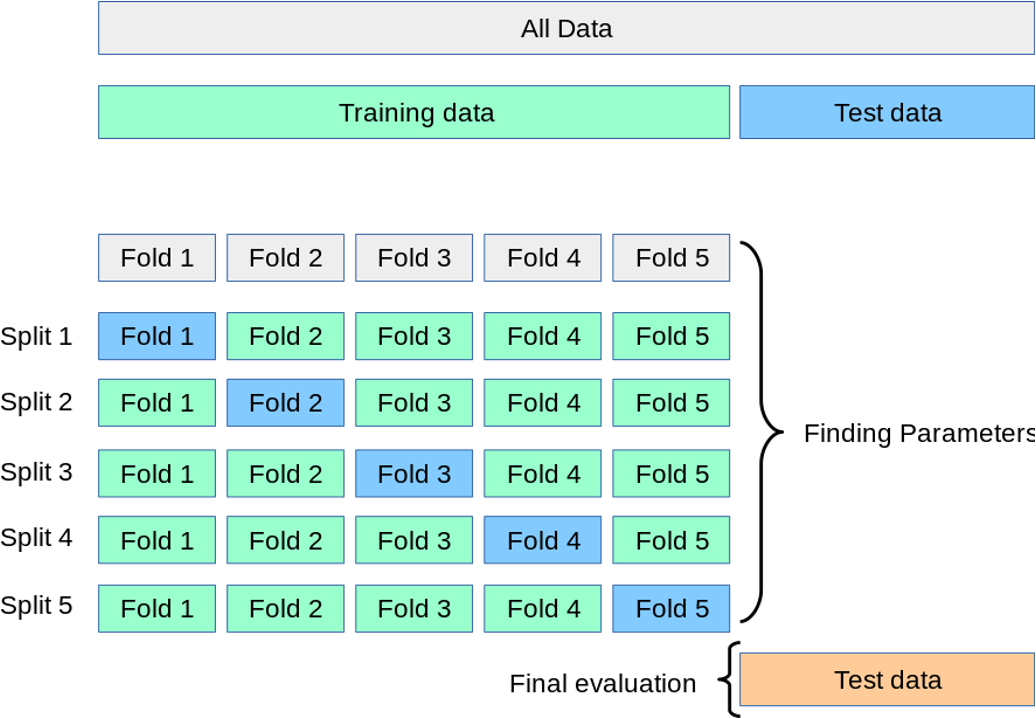

In [28]:
from IPython.display import Image, display
display(Image('images/CV.png', width=600))

k-fold crossvalidation refers to the number of times a new split is created. The image above is an example of 5-fold CV. Cross-validation serves several purposes:
* It allows for no loss in the training dataset size because the model does see all the training data
* The exact split of the data can imapct the final model parameters, therefore creating several splits ensures that the same model is tested several times (eg n=5 for 5-fold CV, or n=10 for 10-fold CV). Therefore, stochastic effects on the model parameters are reduced. Instead of a single value for model accuracy, you produce k-fold values i.e. a distribution of values.

#### Step 4 (again): Model building with regularization and k-fold CV
This time we will use cross-validation to search in alpha-space and tune the model hyperparameter alpha.

There are two popular methods for searching for the best hyper-parameter values - Grid Search and Random Search. Let's implement GridSearchCV for our linear regression model.

In [29]:
from sklearn.model_selection import GridSearchCV

To search along a grid of alphas, we will need to specify a dictionary of hyper-parameter names and thae range of values we want to search in. <br>


In [38]:
# create hyper-parameter dictionary
lr_params = [ {'alpha' : list(np.logspace(0.01, 100, num=10))}]

In [42]:
# call the function
clf = GridSearchCV(linear_model.ridge_regression(processed_X_train, y_train),
                   lr_params,
                   5,
                   mean_squared_error)

NameError: name 'processed_X_train' is not defined

In [35]:
from sklearn.metrics import mean_squared_error

In [39]:
lr_params

[{'alpha': [1.023292992280754,
   131825673855.64047,
   1.698243652461746e+22,
   2.187761623949534e+33,
   2.8183829312644263e+44,
   3.630780547700973e+55,
   4.6773514128720005e+66,
   6.025595860743593e+77,
   7.762471166286928e+88,
   1e+100]}]